Objectives:
1. Form clusters using various Unsupervised Learning techniques.
2. Using the traditional psychometric approach, classify the data into groups of healthy students and non healthy students based on the score.Now compare each of the above clusters, with the original cluster to find the closest approximation.

In [1]:
# Some basic libraries required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

This data is taken from https://www.kaggle.com/datasets/thedevastator/physical-strength-correlation-with-fear-related
Basically, this data contains the demography variables, "Age","Gender","Ethinicity", the Physical features of "Chest" and "grip-strength"of the students of a university. Along with these, the mental health factors of Anxiety, Emotional Dependency, Fearfulness and Sentimentality are recorded as ordinal variables on a scale of 7.

In [2]:
# import dataset
psy_data = pd.read_csv("D:/stats/project_psychometry/Sample_1.csv")
psy_data

,p_id,age,female,ethnicity,grip,chest,e_anx_1,e_anx_2,e_anx_3,e_anx_4,...,e_sen_1,e_sen_2,e_sen_3,e_sen_4,e_sen_5,e_sen_6,e_sen_7,e_sen_8,e_sen_9,e_sen_10
0,103,21,0,8,52,31,6,6,6,7,...,2,4,2,1,1,6,7,2,6,5
1,183,20,0,8,34,38,5,3,5,4,...,4,4,3,3,4,3,3,4,4,4
2,177,19,0,1,48,32,5,5,4,2,...,3,3,1,4,3,7,2,4,4,4
3,133,19,0,1,48,30,5,5,3,4,...,4,4,2,3,4,7,7,4,3,4
4,171,18,0,2,40,40,4,4,5,5,...,3,3,2,4,3,2,3,4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,343,18,1,8,31,20,6,6,5,6,...,5,5,6,6,5,1,1,2,2,2
171,350,22,1,1,25,15,4,3,3,2,...,7,7,7,5,7,1,2,1,1,1
172,355,18,1,8,30,18,5,5,3,5,...,4,3,2,4,3,7,5,3,5,4
173,361,19,1,1,30,23,7,6,6,3,...,5,3,4,5,4,2,5,5,2,5


In [3]:
# Make personal identity numbers as the index number
psy_data=psy_data.set_index(['p_id'])
psy_data

,age,female,ethnicity,grip,chest,e_anx_1,e_anx_2,e_anx_3,e_anx_4,e_anx_5,...,e_sen_1,e_sen_2,e_sen_3,e_sen_4,e_sen_5,e_sen_6,e_sen_7,e_sen_8,e_sen_9,e_sen_10
p_id,,,,,,,,,,,,,,,,,,,,,
103,21,0,8,52,31,6,6,6,7,5,...,2,4,2,1,1,6,7,2,6,5
183,20,0,8,34,38,5,3,5,4,4,...,4,4,3,3,4,3,3,4,4,4
177,19,0,1,48,32,5,5,4,2,1,...,3,3,1,4,3,7,2,4,4,4
133,19,0,1,48,30,5,5,3,4,2,...,4,4,2,3,4,7,7,4,3,4
171,18,0,2,40,40,4,4,5,5,3,...,3,3,2,4,3,2,3,4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,18,1,8,31,20,6,6,5,6,3,...,5,5,6,6,5,1,1,2,2,2
350,22,1,1,25,15,4,3,3,2,2,...,7,7,7,5,7,1,2,1,1,1
355,18,1,8,30,18,5,5,3,5,1,...,4,3,2,4,3,7,5,3,5,4


In [4]:
# Check for missing values, data types
psy_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175 entries, 103 to 384
Data columns (total 45 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        175 non-null    int64
 1   female     175 non-null    int64
 2   ethnicity  175 non-null    int64
 3   grip       175 non-null    int64
 4   chest      175 non-null    int64
 5   e_anx_1    175 non-null    int64
 6   e_anx_2    175 non-null    int64
 7   e_anx_3    175 non-null    int64
 8   e_anx_4    175 non-null    int64
 9   e_anx_5    175 non-null    int64
 10  e_anx_6    175 non-null    int64
 11  e_anx_7    175 non-null    int64
 12  e_anx_8    175 non-null    int64
 13  e_anx_9    175 non-null    int64
 14  e_anx_10   175 non-null    int64
 15  e_dep_1    175 non-null    int64
 16  e_dep_2    175 non-null    int64
 17  e_dep_3    175 non-null    int64
 18  e_dep_4    175 non-null    int64
 19  e_dep_5    175 non-null    int64
 20  e_dep_6    175 non-null    int64
 21  e_dep_7    175

Note that there are no missing values and the data types are also appropriate

In [5]:
# Scale the data
from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data and transform the features
psy = scaler.fit_transform(psy_data)
psy

array([[ 1.06534162, -1.01729235,  2.3844099 , ..., -0.53804269,
         2.12991406,  1.0526972 ],
       [ 0.42246306, -1.01729235,  2.3844099 , ...,  0.62439522,
         0.90381221,  0.46412848],
       [-0.22041551, -1.01729235, -0.68699086, ...,  0.62439522,
         0.90381221,  0.46412848],
       ...,
       [-0.86329407,  0.98300159,  2.3844099 , ...,  0.04317627,
         1.51686313,  0.46412848],
       [-0.22041551,  0.98300159, -0.68699086, ...,  1.20561418,
        -0.32228963,  1.0526972 ],
       [-0.22041551,  0.98300159, -0.68699086, ...,  0.04317627,
         0.90381221, -0.12444024]])

## 1. K-Means Clustering for classifying the data

C:\Users\Ammu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


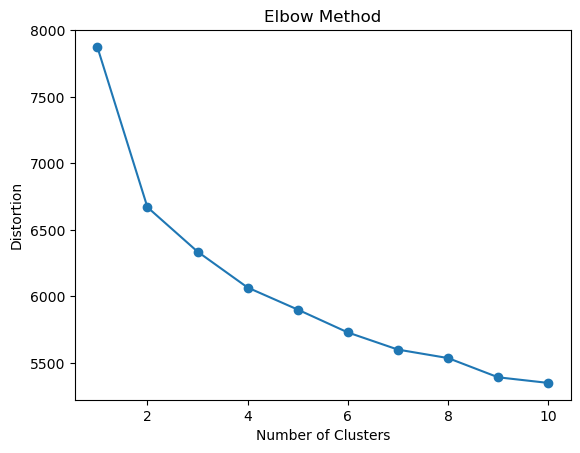

In [6]:
from sklearn.cluster import KMeans

# assigned an empty array for possible cluster values
distortion = [] 
max_clusters = 10

# for each value, fit the data and check for inertia
for k in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(psy)
    distortion.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, max_clusters + 1), distortion, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()

So there are going to be 2 clusters - 1. Emotionally healthy, 2. Requires support

In [7]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=2)
kmeans.fit(psy)

# Print the cluster labels
print("Cluster Labels:")
kmeans.labels_

Cluster Labels:


array([0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1])

## 2. Agglomerative Clustering

In [8]:
from sklearn.cluster import AgglomerativeClustering

In [9]:
#Performing the agglomerative clustering
agg_clusters= AgglomerativeClustering(n_clusters=2).fit(psy)

# print the class labels
print(agg_clusters.labels_)

[0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1
 0 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1
 1 0 1 0 0 0 0 1 0 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1]


## 3. Affinity Propogation

In [10]:
from sklearn.cluster import AffinityPropagation

In [11]:
# preference parameter
pref = -600

# Perform Affinity Propagation clustering
prop = AffinityPropagation(preference=pref)
prop=prop.fit(psy)

# Print the cluster labels
print("Cluster Labels:")
print(prop.labels_)

Cluster Labels:
[0 1 0 0 0 0 1 1 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1
 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 0 0 1
 1 0 1 1 0 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1]


## 4. DB SCAN

In [12]:
from sklearn.cluster import DBSCAN

In [13]:
# I need 2 clusters, and found the minimum value of epsilon and minimum samples for that
for i in range(1,11):
    for j in range(1,21):
        labels = DBSCAN(eps=i, min_samples=j).fit_predict(psy)
        # Collect data points for each cluster
        clusters = [psy[labels == label] for label in np.unique(labels) if label != -1]
        if (len(np.unique(labels))-1==2):
            print("For 2 clusters, one needs Epsilon=",i," and Minimum number of samples=",j)

For 2 clusters, one needs Epsilon= 6  and Minimum number of samples= 14
For 2 clusters, one needs Epsilon= 6  and Minimum number of samples= 15
For 2 clusters, one needs Epsilon= 6  and Minimum number of samples= 16
For 2 clusters, one needs Epsilon= 6  and Minimum number of samples= 17
For 2 clusters, one needs Epsilon= 6  and Minimum number of samples= 18


In [14]:
# perform the DBSCAN
db_labels = DBSCAN(eps=6, min_samples=14).fit_predict(psy)
db_labels=abs(db_labels)
db_labels

array([1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

## 5. FUZZY C-MEANS

In [15]:
from fcmeans import FCM

In [16]:
# create an instance of the FCM model
fcm_model = FCM(n_clusters=2)

# fit the model on the data
fcm_model.fit(psy)

# make predictions using the model
fuz_labels = fcm_model.predict(psy)
fuz_labels

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1],
      dtype=int64)

## Traditional Approach:

The next stage is to combine columns from column-5 to column-44 of the dataframe before scaling together, based on the negative and positive behavior of the question. 
For example, the e_anx_1 is the response of the student to the question, "Often worry about things that turn out to be unimportant". The higher the value of the response, the higher the person shows symptomns of anxiety. Hence this is an anxiety-positive question. At the same time, the question, e_anx_6 is the response for "Rarely worry" which shows a lack of anxiety and is an anxiety negative variable. 

Similarly, combine all the anxiety-positive, anxiety-negative, emotional dependency negative, dependency negative, fearfulness-positive, fearfulness-negative, sentimentality-positive and sentimentality-negative variables, by simply adding these variables together. 

In [17]:
# Add all the positive and negative variables together and add these columns to the dataframe
psy_data['anx_pos'] = psy_data[['e_anx_1', 'e_anx_2','e_anx_3', 'e_anx_4', 'e_anx_5']].sum(axis=1)
psy_data['anx_neg'] = psy_data[['e_anx_6', 'e_anx_7', 'e_anx_8','e_anx_9', 'e_anx_10']].sum(axis=1)
psy_data['dep_pos'] = psy_data[['e_dep_1', 'e_dep_2', 'e_dep_3', 'e_dep_4','e_dep_5', 'e_dep_6', 'e_dep_7', 'e_dep_8', 'e_dep_9', 'e_dep_10']].sum(axis=1)
psy_data['fear_pos'] = psy_data[['e_fear_1', 'e_fear_2', 'e_fear_3', 'e_fear_4', 'e_fear_5']].sum(axis=1)
psy_data['fear_neg'] = psy_data[['e_fear_6','e_fear_7', 'e_fear_8', 'e_fear_9', 'e_fear_10']].sum(axis=1)
psy_data['sen_pos'] = psy_data[['e_sen_1', 'e_sen_2','e_sen_3', 'e_sen_4', 'e_sen_5']].sum(axis=1)
psy_data['sen_neg'] = psy_data[['e_sen_6', 'e_sen_7', 'e_sen_8','e_sen_9', 'e_sen_10']].sum(axis=1)

# Score of each individual is taken as the difference between sum of all positive factors and sum of the reverse of all negative factors
# Reverse of the negative factor is 8-value. Since there are 15 columns, taken 15*8-sum of these factors
psy_data['score'] = psy_data[['anx_pos','dep_pos','fear_pos','sen_pos']].sum(axis=1)+15*8-psy_data[['anx_neg','fear_neg','sen_neg']].sum(axis=1)
psy_data

,age,female,ethnicity,grip,chest,e_anx_1,e_anx_2,e_anx_3,e_anx_4,e_anx_5,...,e_sen_9,e_sen_10,anx_pos,anx_neg,dep_pos,fear_pos,fear_neg,sen_pos,sen_neg,score
p_id,,,,,,,,,,,,,,,,,,,,,
103,21,0,8,52,31,6,6,6,7,5,...,6,5,30,19,40,12,25,10,26,142
183,20,0,8,34,38,5,3,5,4,4,...,4,4,21,19,41,20,20,18,18,163
177,19,0,1,48,32,5,5,4,2,1,...,4,4,17,30,41,8,28,14,21,121
133,19,0,1,48,30,5,5,3,4,2,...,3,4,19,22,38,18,18,17,25,147
171,18,0,2,40,40,4,4,5,5,3,...,5,4,21,26,40,16,21,15,18,147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,18,1,8,31,20,6,6,5,6,3,...,2,2,26,17,42,17,17,27,8,190
350,22,1,1,25,15,4,3,3,2,2,...,1,1,14,25,46,21,27,33,6,176
355,18,1,8,30,18,5,5,3,5,1,...,5,4,19,18,27,11,24,16,24,127


In [18]:
# Check for the normality of the scores
from scipy.stats import shapiro
shapiro(psy_data['score'])

ShapiroResult(statistic=0.9875690937042236, pvalue=0.12575864791870117)

In [19]:
# split the group into 2 groups using the traditional threshold method.
# Threshold will be set using the mean of the scores, since the distribution is normal
psy_data['score'].describe()

count    175.000000
mean     164.971429
std       31.851565
min       95.000000
25%      142.500000
50%      168.000000
75%      186.000000
max      242.000000
Name: score, dtype: float64

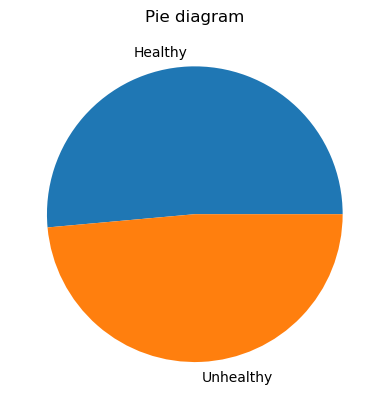

In [20]:
# check balance of the data
psy_data.loc[psy_data['score'] <= 165, 'class'] = 0
psy_data.loc[psy_data['score'] > 165, 'class'] = 1
plt.pie(psy_data['class'].value_counts(),labels=['Healthy','Unhealthy'])
plt.title('Pie diagram')
plt.show()

In [21]:
# Combine the predicted values into a dataframe to make it handy
Pred = np.array([kmeans.labels_,fuz_labels,agg_clusters.labels_,prop.labels_,db_labels]).T
Pred = pd.DataFrame(Pred,columns=['KMeans','Agglomerative','Affinity_Propogation','DBSCAN','Fuzzy_CMeans'])
Pred

,KMeans,Agglomerative,Affinity_Propogation,DBSCAN,Fuzzy_CMeans
0,0,0,0,0,1
1,1,0,0,1,1
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
170,1,1,1,1,1
171,1,1,1,1,1
172,0,0,0,0,1
173,1,1,1,1,1


In [22]:
# To determine the best model, compare their accuracy, precision and Recall
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [25]:
# Get the accuracy of the K-Means, Agglomerative, Affinity,DBSCAN, Fuzzy method using the given functions
for j in ['KMeans','Agglomerative','Affinity_Propogation','DBSCAN','Fuzzy_CMeans']:
    print('Using the',j, 'method:')
    print(accuracy_score(psy_data['class'],Pred[j]))
    print(precision_score(psy_data['class'],Pred[j]))
    print(recall_score(psy_data['class'],Pred[j]))
    print()
# Since the data is balanced, the Accuracy value is valid.

Using the KMeans method:
0.9485714285714286
0.9175257731958762
0.9888888888888889

Using the Agglomerative method:
0.9542857142857143
0.9555555555555556
0.9555555555555556

Using the Affinity_Propogation method:
0.7942857142857143
0.921875
0.6555555555555556

Using the DBSCAN method:
0.9142857142857143
0.9032258064516129
0.9333333333333333

Using the Fuzzy_CMeans method:
0.5771428571428572
0.5526315789473685
0.9333333333333333



The Overall performance of the agglomerative clustering is better than all other clustering algorithms